In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
seed = 44


In [2]:
bodmas_df = '../datasets/bodmas.npz'

In [3]:
data = np.load(bodmas_df)
X = data['X']  # all the feature vectors
y = data['y']  # labels, 0 as benign, 1 as malicious

print(X.shape, y.shape)
frame = pd.DataFrame(data['X'])
frame

(134435, 2381) (134435,)


,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134430,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,72.0,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134431,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,72.0,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134432,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,64.0,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0
134433,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,64.0,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0


In [ ]:
selected_features = frame.loc[:, (frame > 1.0).any()]
selected_features.shape

(134435, 1489)

In [5]:
np.unique(y)

array([0, 1], dtype=int32)

In [6]:
metadata = pd.read_csv('../datasets/bodmas_metadata.csv', parse_dates=['timestamp'])
metadata_new = pd.read_csv('../datasets/bodmas_metadata_new.csv', parse_dates=['timestamp'])
metadata_new.head()

,sha,timestamp,family,timestamp_new
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,2007-01-01 08:46:39+00:00,NaN,2007-01-01 08:46:39+00:00
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,2007-01-26 17:16:30+00:00,NaN,2007-01-26 17:16:30+00:00
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,2007-03-21 02:08:53+00:00,NaN,2007-03-21 02:08:53+00:00
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,2007-04-25 12:55:06+00:00,NaN,2007-04-25 12:55:06+00:00
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,2007-11-14 15:03:55+00:00,NaN,2007-11-14 15:03:55+00:00


In [7]:
metadata_new.family.unique()

array([nan, 'autoit', 'sakurel', 'gupboot', 'juched', 'hpgandcrab',
       'fuerboos', 'noancooe', 'skeeyah', 'wacatac', 'mira', 'upatre',
       'delfiles', 'ceeinject', 'plugx', 'unruy', 'cambot', 'klez',
       'mocrt', 'nitol', 'vb', 'small', 'simda', 'sillyp2p', 'ditertag',
       'padodor', 'dinwod', 'fakefolder', 'dofoil', 'mydoom', 'urelas',
       'qqpass', 'benjamin', 'gandcrab', 'gepys', 'fearso', 'wanna',
       'dorv', 'qlowzones', 'injector', 'qhosts', 'lolbot', 'wabot',
       'ganelp', 'malex', 'vobfus', 'systex', 'blocker', 'shifu', 'sytro',
       'cuegoe', 'stration', 'occamy', 'trojanx', 'tofsee', 'stormser',
       'ainslot', 'vtflooder', 'sfone', 'picsys', 'koceg', 'duptwux',
       'simbot', 'obfuscator', 'autinject', 'socks', 'pluto',
       'cryptominer', 'plite', 'fuery', 'musecador', 'fareit', 'berbew',
       'drolnux', 'lunam', 'floxif', 'zbot', 'netwire', 'grandcrab',
       'ursnif', 'msposer', 'autorun', 'soltern', 'mofksys', 'carberp',
       'laqma', '

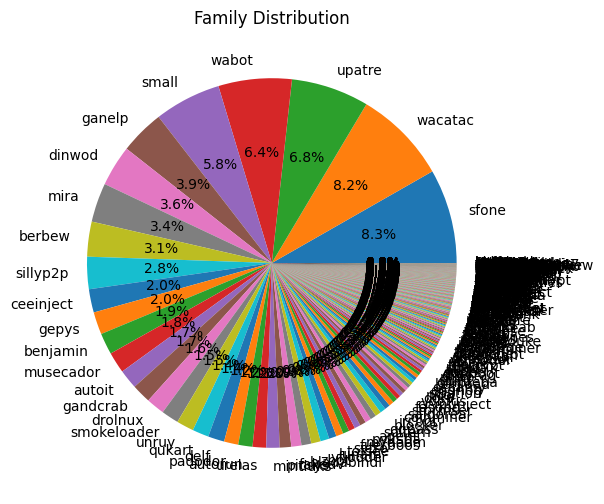

In [8]:
metadata_new.family.value_counts()
# metadata_new.family.value_counts().plot(kind='bar', figsize=(12, 6), title='Family Distribution')
plt.figure(figsize=(12, 6))
plt.pie(metadata_new.family.value_counts(), labels=metadata_new.family.value_counts().index, autopct='%1.1f%%')
plt.title('Family Distribution')
plt.show()

In [9]:
family_counts = metadata_new.family.value_counts().to_frame().head(20)
family_counts

,count
family,
sfone,4729
wacatac,4694
upatre,3901
wabot,3673
small,3339
ganelp,2232
dinwod,2057
mira,1960
berbew,1749


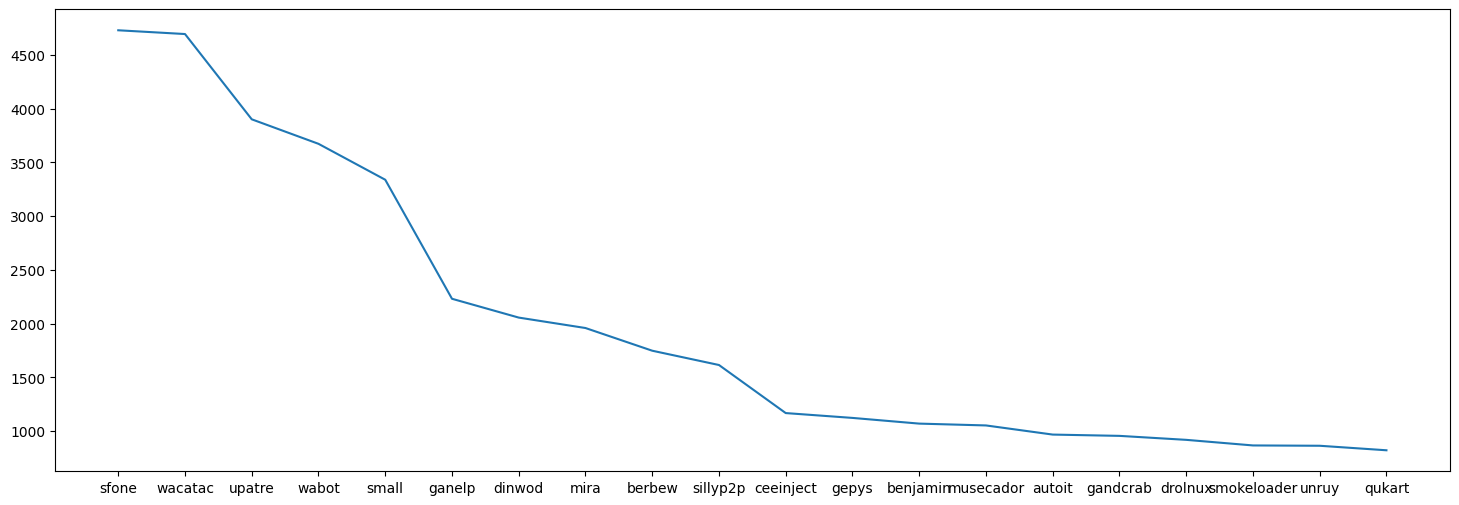

In [10]:
family_counter = metadata_new.family.value_counts().to_frame().head(20)
plt.figure(figsize=(18, 6))
plt.plot(family_counter)
plt.show()

In [11]:
metadata_new.isnull().sum()

sha                  0
timestamp            0
family           77142
timestamp_new        0
dtype: int64

In [12]:
metadata_new.fillna('benign', inplace=True)
metadata_new.family[metadata_new.family == 'benign'].count()

np.int64(77142)

In [13]:
helo = pd.to_datetime(metadata_new.timestamp[0])

helo

Timestamp('2007-01-01 08:46:39+0000', tz='UTC')

In [14]:
metadata_new.head()

,sha,timestamp,family,timestamp_new
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,2007-01-01 08:46:39+00:00,benign,2007-01-01 08:46:39+00:00
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,2007-01-26 17:16:30+00:00,benign,2007-01-26 17:16:30+00:00
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,2007-03-21 02:08:53+00:00,benign,2007-03-21 02:08:53+00:00
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,2007-04-25 12:55:06+00:00,benign,2007-04-25 12:55:06+00:00
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,2007-11-14 15:03:55+00:00,benign,2007-11-14 15:03:55+00:00


In [15]:
metadata_new['timestamp_new'] = pd.to_datetime(metadata_new['timestamp_new'], utc=True).astype(np.int64)
metadata_new.head()

,sha,timestamp,family,timestamp_new
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,2007-01-01 08:46:39+00:00,benign,1167641199000000000
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,2007-01-26 17:16:30+00:00,benign,1169831790000000000
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,2007-03-21 02:08:53+00:00,benign,1174442933000000000
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,2007-04-25 12:55:06+00:00,benign,1177505706000000000
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,2007-11-14 15:03:55+00:00,benign,1195052635000000000


In [16]:
metadata_new.family[metadata_new.family == 'benign'].count()

np.int64(77142)

In [17]:
last_61 = metadata_new.tail(101)
last_61[last_61['family'] == 'benign'].count()

sha              41
timestamp        41
family           41
timestamp_new    41
dtype: int64

In [18]:
last_61_y = y[-101:]
(last_61_y == 0).sum()

np.int64(41)

In [19]:
bodmas_category = pd.read_csv('../datasets/bodmas_malware_category.csv')
bodmas_category.head()

,sha256,category
0,6a695877f571d043fe08d3cc715d9d4b4af85ffe837fa0...,worm
1,9ef9439795cac85e711b59df296a19e7ac43c144035f2f...,trojan
2,32de655f9010d8d152db16c6e5bbad215fa09286a08ff1...,worm
3,a68f7fb26ad84859625002395cf67f22ea0956996ed9c8...,downloader
4,d5c74472adfda20166a65f8b2886819a014ebcb67b999e...,trojan


In [20]:
metadata_new.family.unique().shape

(583,)

In [21]:
bodmas_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57293 entries, 0 to 57292
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sha256    57293 non-null  object
 1   category  57293 non-null  object
dtypes: object(2)
memory usage: 895.3+ KB


In [22]:
bodmas_category.rename(columns={'sha256': 'sha'}, inplace=True)
bodmas_category.head()

,sha,category
0,6a695877f571d043fe08d3cc715d9d4b4af85ffe837fa0...,worm
1,9ef9439795cac85e711b59df296a19e7ac43c144035f2f...,trojan
2,32de655f9010d8d152db16c6e5bbad215fa09286a08ff1...,worm
3,a68f7fb26ad84859625002395cf67f22ea0956996ed9c8...,downloader
4,d5c74472adfda20166a65f8b2886819a014ebcb67b999e...,trojan


In [23]:
metadata_new[metadata_new['family'] != 'benign'].count()

sha              57293
timestamp        57293
family           57293
timestamp_new    57293
dtype: int64

In [24]:
bodmas_data = pd.merge(metadata_new, bodmas_category, on='sha', how='left')
bodmas_data.drop(columns=['timestamp'], inplace=True)
bodmas_data.head()

,sha,family,timestamp_new,category
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,benign,1167641199000000000,NaN
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,benign,1169831790000000000,NaN
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,benign,1174442933000000000,NaN
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,benign,1177505706000000000,NaN
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,benign,1195052635000000000,NaN


In [25]:
bodmas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134435 entries, 0 to 134434
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   sha            134435 non-null  object
 1   family         134435 non-null  object
 2   timestamp_new  134435 non-null  int64 
 3   category       57293 non-null   object
dtypes: int64(1), object(3)
memory usage: 4.1+ MB


In [26]:
bodmas_data.category.fillna('benign', inplace=True)
bodmas_data.head()

,sha,family,timestamp_new,category
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,benign,1167641199000000000,benign
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,benign,1169831790000000000,benign
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,benign,1174442933000000000,benign
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,benign,1177505706000000000,benign
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,benign,1195052635000000000,benign


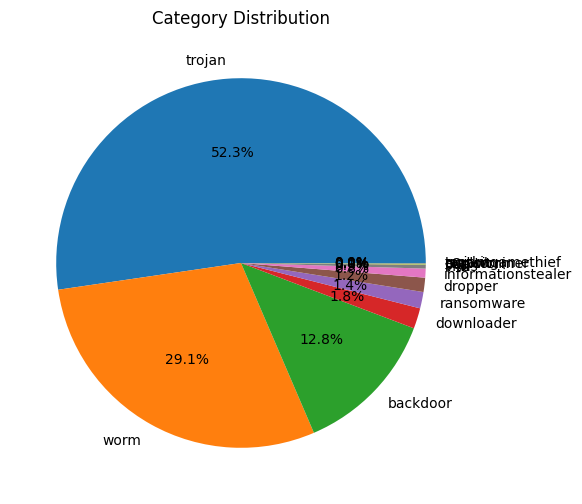

In [27]:
no_benign = bodmas_data[bodmas_data['category'] != 'benign']
plt.figure(figsize=(12, 6))
plt.pie(no_benign.category.value_counts(), labels=no_benign.category.value_counts().index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

In [28]:
no_benign.category.unique()

array(['trojan', 'worm', 'backdoor', 'downloader', 'informationstealer',
       'dropper', 'ransomware', 'rootkit', 'cryptominer', 'pua',
       'exploit', 'virus', 'p2p-worm', 'trojan-gamethief'], dtype=object)

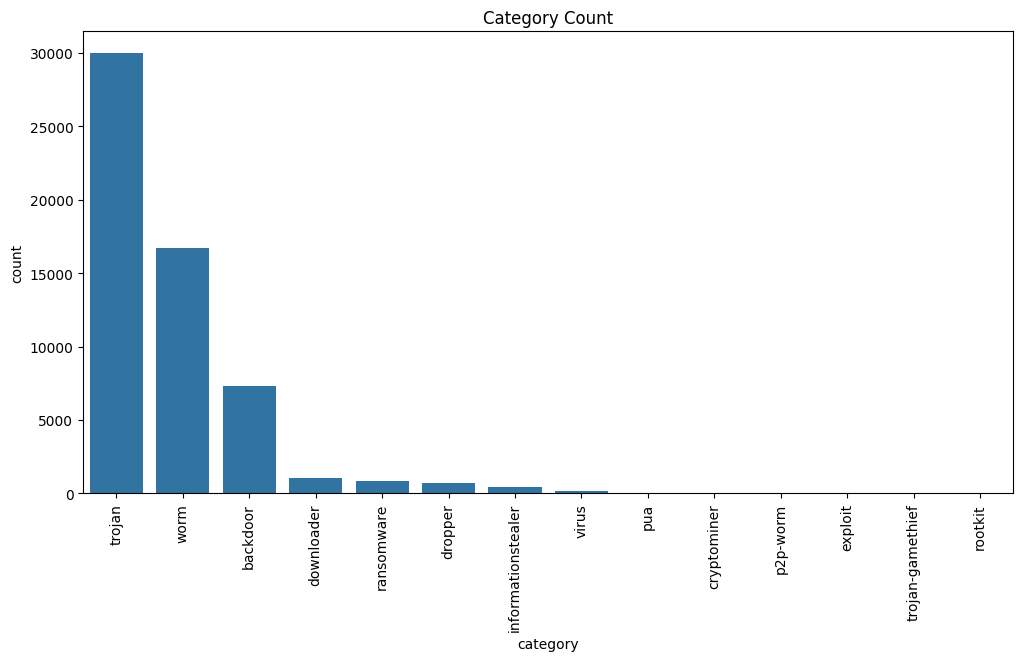

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=no_benign, x='category', order=no_benign.category.value_counts().index)
plt.xticks(rotation=90)
plt.title('Category Count')
plt.show()

In [30]:
le = LabelEncoder()
bodmas_data['category'] = le.fit_transform(bodmas_data['category'])
bodmas_data['family'] = le.fit_transform(bodmas_data['family'])
bodmas_data.head()

,sha,family,timestamp_new,category
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,54,1167641199000000000,1
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,54,1169831790000000000,1
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,54,1174442933000000000,1
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,54,1177505706000000000,1
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,54,1195052635000000000,1


In [31]:
print(bodmas_data['category'].unique())
print(bodmas_data['family'].unique())

[ 1 11 14  0  3  6  4  9 10  2  8  5 13  7 12]
[ 54  33 438 234 260 241 201 347 464 552 320 520 138  94 380 517  87 271
 324 344 528 465 457 453 145 360 143 181 147 331 522 407  55 209 221 186
 555 150 406 250 405 295 550 211 307 546 490  71 449 492 124 484 355 510
 501 483  15 548 444 374 273 158 456 353  31 469 381 120 379 202 330 182
  56 155 299 195 578 343 231 523 328  37 473 325  89 285 463 518 536 574
 185  76 106 357  68 399 393  34 362 432   6 447 131 162   3  48 408 402
 225 238 439 340  66   1 427 576 206 270 496  96 272 137  18 434 466 140
 251 544 495 118 174 545  50 214 337 529 428  98 491 383 262 192 571 443
 579 159 244 422  22 412 253 538 100 168 254 512 178 531 335 179  82 242
 210  85  99 171 395  35  59  74 561 566 540 170 203 107  65 296 547 136
 433 327  61  10  58 475 507 122  21 176 419 275  28  73  52 269 115 265
 130 356 263 212 314  91 424 398 363 304 459 499 161 385 448 371 373 184
 541 497  62  49 322 568 471 562 429 282 543 542  24 152 442  20 505 452
 226

In [32]:
bodmas_data.drop('sha', axis=1, inplace=True)
bodmas_pd = pd.DataFrame(bodmas_data)
bodmas_pd

,family,timestamp_new,category
0,54,1167641199000000000,1
1,54,1169831790000000000,1
2,54,1174442933000000000,1
3,54,1177505706000000000,1
4,54,1195052635000000000,1
...,...,...,...
134430,33,1601435122000000000,11
134431,33,1601435123000000000,11
134432,33,1601435124000000000,11
134433,33,1601435126000000000,11


In [33]:
X_data = pd.DataFrame(data['X'])
y_real = pd.DataFrame(data['y'])
X_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Combine the feature vectors with the metadata but without the category column
X_data_label = pd.concat([X_data, bodmas_data[['timestamp_new', 'family']], y_real], axis=1, ignore_index=True, sort=False)

In [35]:
X_data_label.tail()

,0,1,2,3,4,5,6,7,8,9,...,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383
134430,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601435122000000000,33,1
134431,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601435123000000000,33,1
134432,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435124000000000,33,1
134433,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435126000000000,33,1
134434,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435127000000000,33,1


In [36]:
bodmas_data['category'].unique()

array([ 1, 11, 14,  0,  3,  6,  4,  9, 10,  2,  8,  5, 13,  7, 12])

In [37]:
y_data = bodmas_data.category.values
y_data

array([ 1,  1,  1, ..., 11, 11, 11], shape=(134435,))

In [38]:
len(X_data), len(y_data), len(bodmas_data), len(X)

(134435, 134435, 134435, 134435)

In [39]:
X_data.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
2376    0
2377    0
2378    0
2379    0
2380    0
Length: 2381, dtype: int64

In [40]:
#Initial: Binary Classification
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, stratify=y, random_state=seed)
#Extended: Multi-class Classification with family labels
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_data_label, y_data, test_size=0.2, stratify=y, random_state=seed)
#Extended: Multi-class Classification without family labels
X_train_cate, X_test_cate, y_train_cate, y_test_cate = train_test_split(X_data, y_data, test_size=0.2, stratify=y, random_state=seed)

In [41]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train_exp.shape, y_train_exp.shape, X_test_exp.shape, y_test_exp.shape)
print(X_train_cate.shape, y_train_cate.shape, X_test_cate.shape, y_test_cate.shape)

(107548, 2381) (107548,) (26887, 2381) (26887,)
(107548, 2384) (107548,) (26887, 2384) (26887,)
(107548, 2381) (107548,) (26887, 2381) (26887,)


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [46]:
scaler_exp = MinMaxScaler()
X_train_exp = scaler_exp.fit_transform(X_train_exp)
X_test_exp = scaler_exp.fit_transform(X_test_exp)

In [48]:
scaler_cate = MinMaxScaler()
X_train_cate = scaler_cate.fit_transform(X_train_cate)
X_test_cate = scaler_cate.fit_transform(X_test_cate)

In [49]:
def summary(y_test, pred):
    acc = accuracy_score(y_test, pred, normalize=True)
    prec = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    
    print('Length of Testing Data: ', len(y_test))
    print('Accuracy: ', acc)
    print('Precision: ', prec)
    print('Recall Score: ', recall)
    

In [89]:
LogReg = LogisticRegression(random_state=seed)
LogReg.fit(X_train, y_train)
pred = LogReg.predict(X_test)
summary(y_test, pred)

Length of Testing Data:  26887
Accuracy:  0.9594227693680961
Precision:  0.9612904769801818
Recall Score:  0.9594227693680961


In [90]:
LogReg_exp = LogisticRegression(random_state=seed)
LogReg_exp.fit(X_train_exp, y_train_exp)
pred_exp = LogReg_exp.predict(X_test_exp)
summary(y_test_exp, pred_exp)

Length of Testing Data:  26887
Accuracy:  0.9452523524379812
Precision:  0.935891403985065
Recall Score:  0.9452523524379812


In [91]:
LogReg_cate = LogisticRegression(random_state=seed)
LogReg_cate.fit(X_train_cate, y_train_cate)
pred_cate = LogReg_cate.predict(X_test_cate)
summary(y_test_cate, pred_cate)

Length of Testing Data:  26887
Accuracy:  0.8389556291144419
Precision:  0.8386712950716202
Recall Score:  0.8389556291144419


In [92]:
print(LogReg.score(X_train, y_train))
print(LogReg.score(X_test, y_test))
print(LogReg_exp.score(X_train_exp, y_train_exp))
print(LogReg_exp.score(X_test_exp, y_test_exp))
print(LogReg_cate.score(X_train_cate, y_train_cate))
print(LogReg_cate.score(X_test_cate, y_test_cate))

0.9799717335515304
0.9594227693680961
0.9418678171607097
0.9452523524379812
0.9029084687767323
0.8389556291144419


In [93]:
naive_bayes_classifier = MultinomialNB()

In [94]:
naive_bayes_classifier.fit(X_train, y_train)
pred_nb = naive_bayes_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, pred)
print(accuracy_nb)

0.9594227693680961


In [95]:
summary(y_test, pred)

Length of Testing Data:  26887
Accuracy:  0.9594227693680961
Precision:  0.9612904769801818
Recall Score:  0.9594227693680961


In [96]:
alphas = np.arange(0,2, 0.1)

def train_and_evaluate_nb(alpha, X_train, X_test, y_train, y_test):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(X_train, y_train)
    pred_nb = nb_classifier.predict(X_test)
    accuracy_nb = accuracy_score(y_test, pred_nb)
    print(f'Accuracy with alpha={alpha}: {accuracy_nb}')
    return accuracy_nb

for alpha in alphas:
    train_and_evaluate_nb(alpha, X_train, X_test, y_train, y_test)

Accuracy with alpha=0.0: 0.5738089039312679
Accuracy with alpha=0.1: 0.7782943429910366
Accuracy with alpha=0.2: 0.7782199576003273
Accuracy with alpha=0.30000000000000004: 0.7781827649049726
Accuracy with alpha=0.4: 0.7781827649049726
Accuracy with alpha=0.5: 0.7782199576003273
Accuracy with alpha=0.6000000000000001: 0.7780711868189087
Accuracy with alpha=0.7000000000000001: 0.7780711868189087
Accuracy with alpha=0.8: 0.7780339941235541
Accuracy with alpha=0.9: 0.7779968014281995
Accuracy with alpha=1.0: 0.7779596087328449
Accuracy with alpha=1.1: 0.777848030646781
Accuracy with alpha=1.2000000000000002: 0.777848030646781
Accuracy with alpha=1.3: 0.7778108379514264
Accuracy with alpha=1.4000000000000001: 0.7778108379514264
Accuracy with alpha=1.5: 0.7778108379514264
Accuracy with alpha=1.6: 0.7777736452560717
Accuracy with alpha=1.7000000000000002: 0.7778108379514264
Accuracy with alpha=1.8: 0.7777736452560717
Accuracy with alpha=1.9000000000000001: 0.7776992598653625


In [97]:
naive_bayes_classifier.fit(X_train_exp, y_train_exp)
pred_nb_exp = naive_bayes_classifier.predict(X_test_exp)
accuracy_nb_exp = accuracy_score(y_test_exp, pred_nb_exp)
print(accuracy_nb_exp)
summary(y_test_exp, pred_nb_exp)

0.6657864395432737
Length of Testing Data:  26887
Accuracy:  0.6657864395432737
Precision:  0.8575393559351874
Recall Score:  0.6657864395432737


In [98]:
naive_bayes_classifier.fit(X_train_cate, y_train_cate)
pred_nb_cate = naive_bayes_classifier.predict(X_test_cate)
accuracy_nb_cate = accuracy_score(y_test_cate, pred_nb_cate)
print(accuracy_nb_cate)
summary(y_test_cate, pred_nb_cate)

0.601517461970469
Length of Testing Data:  26887
Accuracy:  0.601517461970469
Precision:  0.7635569338505406
Recall Score:  0.601517461970469


In [99]:
for alpha in alphas:
    train_and_evaluate_nb(alpha, X_train_exp, X_test_exp, y_train_exp, y_test_exp)

Accuracy with alpha=0.0: 0.05630974076691338
Accuracy with alpha=0.1: 0.6626622531334846
Accuracy with alpha=0.2: 0.6834157771413695
Accuracy with alpha=0.30000000000000004: 0.6814445642875739
Accuracy with alpha=0.4: 0.6791758098709414
Accuracy with alpha=0.5: 0.6777624874474654
Accuracy with alpha=0.6000000000000001: 0.6764607431100532
Accuracy with alpha=0.7000000000000001: 0.6747498791237401
Accuracy with alpha=0.8: 0.6712537657604046
Accuracy with alpha=0.9: 0.6681295793506156
Accuracy with alpha=1.0: 0.6657864395432737
Accuracy with alpha=1.1: 0.664038382861606
Accuracy with alpha=1.2000000000000002: 0.6625878677427753
Accuracy with alpha=1.3: 0.6619927846171012
Accuracy with alpha=1.4000000000000001: 0.6617696284449734
Accuracy with alpha=1.5: 0.6616580503589095
Accuracy with alpha=1.6: 0.6612117380146539
Accuracy with alpha=1.7000000000000002: 0.6608398110611076
Accuracy with alpha=1.8: 0.6607654256703983
Accuracy with alpha=1.9000000000000001: 0.6605794621936252


In [100]:
for alpha in alphas:
    train_and_evaluate_nb(alpha, X_train_cate, X_test_cate, y_train_cate, y_test_cate)

Accuracy with alpha=0.0: 0.05630974076691338
Accuracy with alpha=0.1: 0.593521032469223
Accuracy with alpha=0.2: 0.6133075463978874
Accuracy with alpha=0.30000000000000004: 0.612638077881504
Accuracy with alpha=0.4: 0.6114851043255105
Accuracy with alpha=0.5: 0.6105552869416446
Accuracy with alpha=0.6000000000000001: 0.6100345892066799
Accuracy with alpha=0.7000000000000001: 0.6093279279949418
Accuracy with alpha=0.8: 0.6066500539294083
Accuracy with alpha=0.9: 0.6039349871685201
Accuracy with alpha=1.0: 0.601517461970469
Accuracy with alpha=1.1: 0.6002157176330569
Accuracy with alpha=1.2000000000000002: 0.5989511659909994
Accuracy with alpha=1.3: 0.5988767806002901
Accuracy with alpha=1.4000000000000001: 0.5984304682560345
Accuracy with alpha=1.5: 0.5982445047792614
Accuracy with alpha=1.6: 0.5980585413024881
Accuracy with alpha=1.7000000000000002: 0.5978353851303604
Accuracy with alpha=1.8: 0.5976866143489419
Accuracy with alpha=1.9000000000000001: 0.5976494216535873


In [101]:
ovr_classifier = OneVsRestClassifier(MultinomialNB())
ovr_classifier.fit(X_train, y_train)
pred_ovr = ovr_classifier.predict(X_test)
accuracy_ovr = accuracy_score(y_test, pred_ovr)
print(accuracy_ovr)
summary(y_test, pred_ovr)

ovr_classifier.fit(X_train_exp, y_train_exp)
pred_ovr_exp = ovr_classifier.predict(X_test_exp)
accuracy_ovr_exp = accuracy_score(y_test_exp, pred_ovr_exp)
print(accuracy_ovr_exp)
summary(y_test_exp, pred_ovr_exp)

ovr_classifier.fit(X_train_cate, y_train_cate)
pred_ovr_cate = ovr_classifier.predict(X_test_cate)
accuracy_ovr_cate = accuracy_score(y_test_cate, pred_ovr_cate)
print(accuracy_ovr_cate)
summary(y_test_cate, pred_ovr_cate)

0.7779596087328449
Length of Testing Data:  26887
Accuracy:  0.7779596087328449
Precision:  0.7818152056757309
Recall Score:  0.7779596087328449
0.7398370959943467
Length of Testing Data:  26887
Accuracy:  0.7398370959943467
Precision:  0.863790942041558
Recall Score:  0.7398370959943467
0.6497935805407818
Length of Testing Data:  26887
Accuracy:  0.6497935805407818
Precision:  0.7580737803024589
Recall Score:  0.6497935805407818


In [102]:
def train_and_evaluate_ovr(alpha, X_train, X_test, y_train, y_test):
    ovr_classifier = OneVsRestClassifier(MultinomialNB())
    ovr_classifier.fit(X_train, y_train)
    pred_ovr = ovr_classifier.predict(X_test)
    accuracy_ovr = accuracy_score(y_test, pred_ovr)
    print(f'Accuracy with OVR:={alpha}: {accuracy_ovr}')
    return accuracy_ovr


In [103]:
for alpha in alphas:
    train_and_evaluate_ovr(alpha, X_train, X_test, y_train, y_test)


Accuracy with OVR:=0.0: 0.7779596087328449
Accuracy with OVR:=0.1: 0.7779596087328449
Accuracy with OVR:=0.2: 0.7779596087328449
Accuracy with OVR:=0.30000000000000004: 0.7779596087328449
Accuracy with OVR:=0.4: 0.7779596087328449
Accuracy with OVR:=0.5: 0.7779596087328449
Accuracy with OVR:=0.6000000000000001: 0.7779596087328449
Accuracy with OVR:=0.7000000000000001: 0.7779596087328449
Accuracy with OVR:=0.8: 0.7779596087328449
Accuracy with OVR:=0.9: 0.7779596087328449
Accuracy with OVR:=1.0: 0.7779596087328449
Accuracy with OVR:=1.1: 0.7779596087328449
Accuracy with OVR:=1.2000000000000002: 0.7779596087328449
Accuracy with OVR:=1.3: 0.7779596087328449
Accuracy with OVR:=1.4000000000000001: 0.7779596087328449
Accuracy with OVR:=1.5: 0.7779596087328449
Accuracy with OVR:=1.6: 0.7779596087328449
Accuracy with OVR:=1.7000000000000002: 0.7779596087328449
Accuracy with OVR:=1.8: 0.7779596087328449
Accuracy with OVR:=1.9000000000000001: 0.7779596087328449


In [104]:
for alpha in alphas:
    train_and_evaluate_ovr(alpha, X_train_exp, X_test_exp, y_train_exp, y_test_exp)


Accuracy with OVR:=0.0: 0.7398370959943467
Accuracy with OVR:=0.1: 0.7398370959943467
Accuracy with OVR:=0.2: 0.7398370959943467
Accuracy with OVR:=0.30000000000000004: 0.7398370959943467
Accuracy with OVR:=0.4: 0.7398370959943467
Accuracy with OVR:=0.5: 0.7398370959943467
Accuracy with OVR:=0.6000000000000001: 0.7398370959943467
Accuracy with OVR:=0.7000000000000001: 0.7398370959943467
Accuracy with OVR:=0.8: 0.7398370959943467
Accuracy with OVR:=0.9: 0.7398370959943467
Accuracy with OVR:=1.0: 0.7398370959943467
Accuracy with OVR:=1.1: 0.7398370959943467
Accuracy with OVR:=1.2000000000000002: 0.7398370959943467
Accuracy with OVR:=1.3: 0.7398370959943467
Accuracy with OVR:=1.4000000000000001: 0.7398370959943467
Accuracy with OVR:=1.5: 0.7398370959943467
Accuracy with OVR:=1.6: 0.7398370959943467
Accuracy with OVR:=1.7000000000000002: 0.7398370959943467
Accuracy with OVR:=1.8: 0.7398370959943467
Accuracy with OVR:=1.9000000000000001: 0.7398370959943467


In [105]:
for alpha in alphas:
    train_and_evaluate_ovr(alpha, X_train_cate, X_test_cate, y_train_cate, y_test_cate)

Accuracy with OVR:=0.0: 0.6497935805407818
Accuracy with OVR:=0.1: 0.6497935805407818
Accuracy with OVR:=0.2: 0.6497935805407818
Accuracy with OVR:=0.30000000000000004: 0.6497935805407818
Accuracy with OVR:=0.4: 0.6497935805407818
Accuracy with OVR:=0.5: 0.6497935805407818
Accuracy with OVR:=0.6000000000000001: 0.6497935805407818
Accuracy with OVR:=0.7000000000000001: 0.6497935805407818
Accuracy with OVR:=0.8: 0.6497935805407818
Accuracy with OVR:=0.9: 0.6497935805407818
Accuracy with OVR:=1.0: 0.6497935805407818
Accuracy with OVR:=1.1: 0.6497935805407818
Accuracy with OVR:=1.2000000000000002: 0.6497935805407818
Accuracy with OVR:=1.3: 0.6497935805407818
Accuracy with OVR:=1.4000000000000001: 0.6497935805407818
Accuracy with OVR:=1.5: 0.6497935805407818
Accuracy with OVR:=1.6: 0.6497935805407818
Accuracy with OVR:=1.7000000000000002: 0.6497935805407818
Accuracy with OVR:=1.8: 0.6497935805407818
Accuracy with OVR:=1.9000000000000001: 0.6497935805407818


In [106]:
knn = KNeighborsClassifier(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=seed)

classifiers = [('KNN', knn), ('Decision Tree', dt), ('Logistic Regression', LogReg)]

In [107]:
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(f'Accuracy of {name}: {accuracy_score(y_test, pred)}')
    summary(y_test, pred)

Accuracy of KNN: 0.9820359281437125
Length of Testing Data:  26887
Accuracy:  0.9820359281437125
Precision:  0.9821519872993292
Recall Score:  0.9820359281437125
Accuracy of Decision Tree: 0.7734220998995798
Length of Testing Data:  26887
Accuracy:  0.7734220998995798
Precision:  0.7841373367681626
Recall Score:  0.7734220998995798
Accuracy of Logistic Regression: 0.9594227693680961
Length of Testing Data:  26887
Accuracy:  0.9594227693680961
Precision:  0.9612904769801818
Recall Score:  0.9594227693680961


In [108]:
for name, clf in classifiers:
    clf.fit(X_train_exp, y_train_exp)
    pred_exp = clf.predict(X_test_exp)
    print(f'Accuracy of {name} with extended data: {accuracy_score(y_test_exp, pred_exp)}')
    summary(y_test_exp, pred_exp)

Accuracy of KNN with extended data: 0.9679027039089523
Length of Testing Data:  26887
Accuracy:  0.9679027039089523
Precision:  0.9668121570749457
Recall Score:  0.9679027039089523
Accuracy of Decision Tree with extended data: 0.8590024919105888
Length of Testing Data:  26887
Accuracy:  0.8590024919105888
Precision:  0.8146201050911257
Recall Score:  0.8590024919105888
Accuracy of Logistic Regression with extended data: 0.9452523524379812
Length of Testing Data:  26887
Accuracy:  0.9452523524379812
Precision:  0.935891403985065
Recall Score:  0.9452523524379812


In [109]:
for name, clf in classifiers:
    clf.fit(X_train_cate, y_train_cate)
    pred_cate = clf.predict(X_test_cate)
    print(f'Accuracy of {name} with categorical data: {accuracy_score(y_test_cate, pred_cate)}')
    summary(y_test_cate, pred_cate)

Accuracy of KNN with categorical data: 0.9479302265035147
Length of Testing Data:  26887
Accuracy:  0.9479302265035147
Precision:  0.9467854320327004
Recall Score:  0.9479302265035147
Accuracy of Decision Tree with categorical data: 0.6912262431658422
Length of Testing Data:  26887
Accuracy:  0.6912262431658422
Precision:  0.6704771532809066
Recall Score:  0.6912262431658422
Accuracy of Logistic Regression with categorical data: 0.8389556291144419
Length of Testing Data:  26887
Accuracy:  0.8389556291144419
Precision:  0.8386712950716202
Recall Score:  0.8389556291144419


In [110]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
pred_vc = vc.predict(X_test)
print(f'Accuracy of Voting Classifier: {accuracy_score(y_test, pred_vc)}')
summary(y_test, pred_vc)
vc.fit(X_train_exp, y_train_exp)
pred_vc_exp = vc.predict(X_test_exp)
print(f'Accuracy of Voting Classifier with extended data: {accuracy_score(y_test_exp, pred_vc_exp)}')
summary(y_test_exp, pred_vc_exp)
vc.fit(X_train_cate, y_train_cate)
pred_vc_cate = vc.predict(X_test_cate)
print(f'Accuracy of Voting Classifier with categorical data: {accuracy_score(y_test_cate, pred_vc_cate)}')
summary(y_test_cate, pred_vc_cate)

Accuracy of Voting Classifier: 0.9711012757094507
Length of Testing Data:  26887
Accuracy:  0.9711012757094507
Precision:  0.9715951615934719
Recall Score:  0.9711012757094507
Accuracy of Voting Classifier with extended data: 0.9539182504556105
Length of Testing Data:  26887
Accuracy:  0.9539182504556105
Precision:  0.9518182607289394
Recall Score:  0.9539182504556105
Accuracy of Voting Classifier with categorical data: 0.8797932086138283
Length of Testing Data:  26887
Accuracy:  0.8797932086138283
Precision:  0.8782197470607359
Recall Score:  0.8797932086138283
